# Import the dataset

## Preparing libraries and packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris_dirty.csv',
                 names=['sepal_length',
                        'sepal_width',
                        'petal_length',
                        'petal_width',
                        'class',
                       ],
                header=None,
                )

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
146,6.7,3.0,5.2,23 mm,Iris-virginica
147,6.3,2.5,5.0,19 mm,Iris-virginica
148,6.5,3.0,5.2,20 mm,Iris-virginica
149,6.2,3.4,5.4,23 mm,Iris-virginica
150,5.9,3.0,5.1,18 mm,Iris-virginica


In [5]:
round(df.describe(), 2)
# petal_width? probably object
# keep in mind to remove mm to turn to numbers

,sepal_length,sepal_width,petal_length
count,151.00,150.00,151.00
mean,6.20,3.06,3.76
std,4.32,0.43,1.76
min,4.30,2.00,1.00
25%,5.10,2.80,1.60
50%,5.80,3.00,4.40
75%,6.40,3.30,5.10
max,58.00,4.40,6.90


# EDA

## Checking for NaNs

In [6]:
df.isna().sum()

sepal_length    0
sepal_width     1
petal_length    0
petal_width     0
class           0
dtype: int64

In [7]:
# locating the NaN row
df[df['sepal_width'].isna()]

,sepal_length,sepal_width,petal_length,petal_width,class
82,5.8,NaN,3.9,12 mm,Iris-versicolor


In [8]:
# filling it with the mean
df['sepal_width'] = df['sepal_width'].fillna(df['sepal_width'].mean())

## Back to petal width

In [9]:
# checking the data
df['petal_width'].value_counts()

2 mm     28
13 mm    13
18 mm    12
15 mm    12
14 mm     9
23 mm     8
10 mm     7
4 mm      7
3 mm      7
1 mm      6
21 mm     6
20 mm     6
12 mm     5
19 mm     5
16 mm     4
25 mm     3
22 mm     3
24 mm     3
11 mm     3
17 mm     2
6 mm      1
5 mm      1
Name: petal_width, dtype: int64

In [10]:
# removing mm
df['petal_width'].apply(lambda x: float(x.replace('mm', ''))/10)

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
146    2.3
147    1.9
148    2.0
149    2.3
150    1.8
Name: petal_width, Length: 151, dtype: float64

In [11]:
# replacing column
df['petal_width'] = df['petal_width'].apply(lambda x: float(x.replace('mm', ''))/10)

In [12]:
# checking the fix
round(df.describe(),2)

,sepal_length,sepal_width,petal_length,petal_width
count,151.00,151.00,151.00,151.00
mean,6.20,3.06,3.76,1.20
std,4.32,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.40,1.30
75%,6.40,3.30,5.10,1.80
max,58.00,4.40,6.90,2.50


## Dealing with Outliers

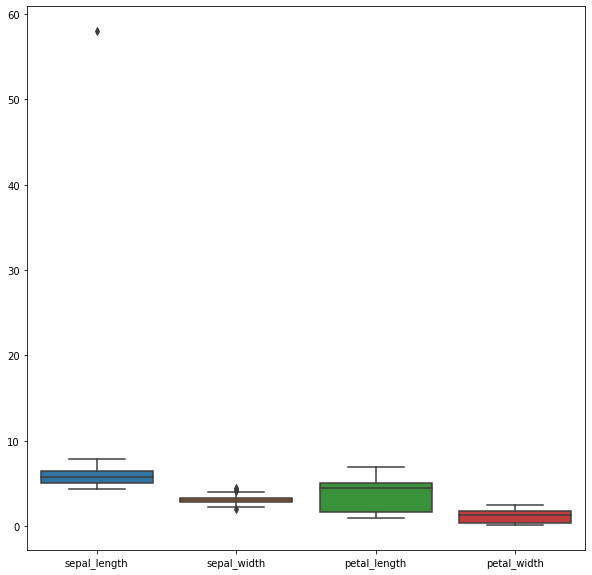

In [13]:
# visualizing the outliers
plt.figure(figsize = (10,10))
sns.boxplot(data = df);

In [14]:
# checking for the outlier
df[df['sepal_length']>50]

,sepal_length,sepal_width,petal_length,petal_width,class
143,58.0,2.7,5.1,1.9,Iris-virginica


## Fixing the sepal length

In [15]:
#since it's probably an error (cm instead of mm), change it
corrected_value = df[df['sepal_length']>50]['sepal_length']/10

In [16]:
# replacing the value
df.loc[143, 'sepal_length'] = float(corrected_value)

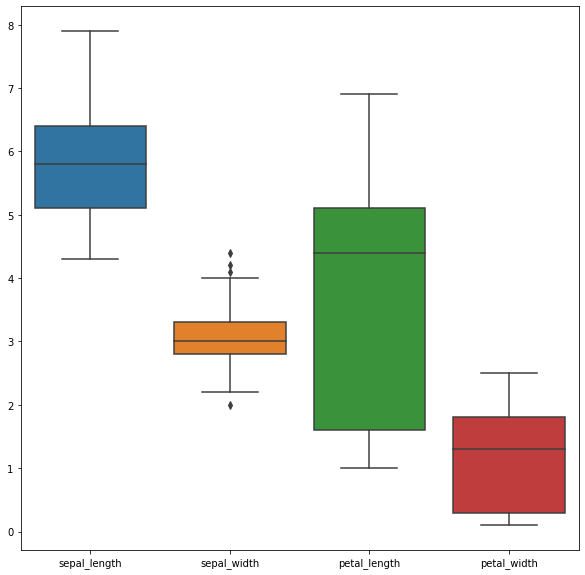

In [17]:
# rechecking the plot without the outlier
plt.figure(figsize = (10,10))
sns.boxplot(data = df);

## Exploring 'class'

In [18]:
# checking the data
df['class'].value_counts()

Iris-versicolor    51
Iris-virginica     50
Iris-setosa        49
Iris-setsoa         1
Name: class, dtype: int64

In [19]:
# fixing the spelling mistake by replacing the column with the spelling
df['class'] = df['class'].apply(lambda x: 'Iris-setosa' if x == 'Iris-setsoa' else x)

In [20]:
# checking the fix
df['class'].value_counts()

Iris-versicolor    51
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

# Visualizing

## Plots

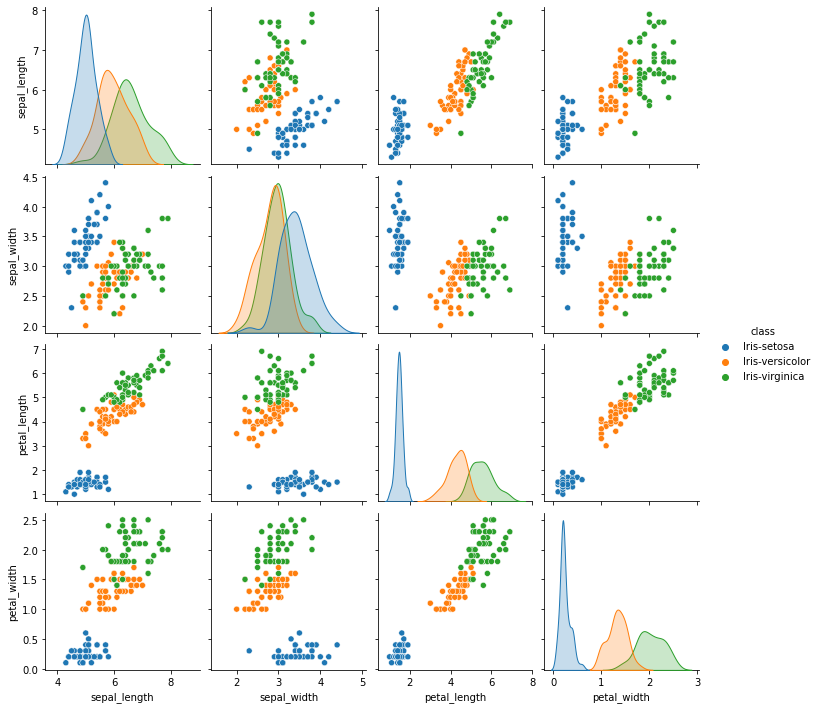

In [21]:
# general plot of all the data by 'class'
sns.pairplot(df, hue = 'class');

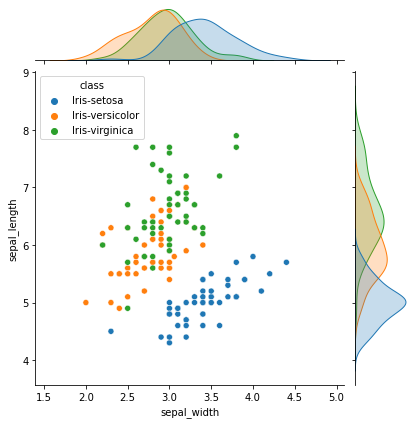

In [22]:
# another approach, easier for detail spotting
sns.jointplot(data = df, x = 'sepal_width', y = 'sepal_length', hue = 'class');

## Correlations

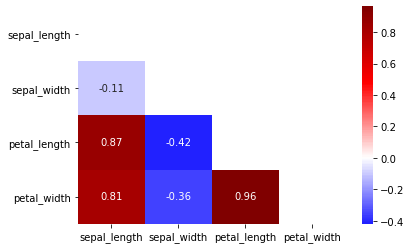

In [23]:
# using a mask to visualize the values only once
mask = np.zeros_like(df.drop('class', axis = 1).corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.drop('class', axis = 1).corr(),
           annot = True,
           center = 0,
           mask = mask,
           cmap = 'seismic')
plt.show();

# Modelling with logic regression

## Preparing the machine larning libraries

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [25]:
lr = LogisticRegression(max_iter = 400)

In [26]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


## Define and store X and y

In [27]:
X = df.drop('class', axis = 1)

In [28]:
y = df['class']

## Split data intro train and test

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

## Fit to start model training

In [30]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [31]:
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.9347826086956522

## Exploring the accuracy score for the predictions

In [32]:
# define a fuction to obtain the accuracy by changing test and train sizes
def get_score (test_size, df):
    X = df.drop('class', axis = 1)
    y = df['class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 100)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    return accuracy_score (y_test, y_pred)

In [33]:
# np.linspace(start, stop, num = number of values you want)
np.linspace(0.1, 0.9, num = 17)

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ])

In [34]:
test_sizes = np.linspace(0.1, 0.9, num = 17)

In [35]:
acc_scores = [(get_score(test_size, df)) for test_size in test_sizes]

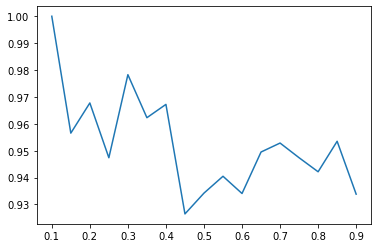

In [36]:
# checking the percentages that are better for the accuracy
plt.plot(test_sizes, acc_scores);

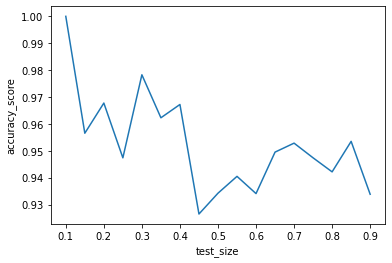

In [37]:
# adding labels to the plot
plt.plot(test_sizes, acc_scores)
plt.xlabel('test_size')
plt.ylabel('accuracy_score');

## Predicting using our test features and checking with confusion matrix

In [38]:
y_pred = lr.predict(X_test)

In [39]:
# confusion matrix
cnfmat = confusion_matrix(y_test, y_pred)

In [40]:
# setting up a dataframe for the confusion matrix
df_cm = pd.DataFrame(cnfmat, columns = np.unique(y_test), index = np.unique(y_test)) # setting the labels
df_cm

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,13,0,0
Iris-versicolor,0,13,1
Iris-virginica,0,2,17


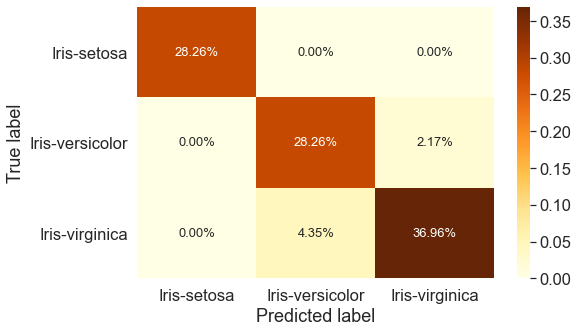

In [41]:
# setting axis's names
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted label'
# fontsize
sns.set(font_scale = 1.5)
# plot size
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(df_cm/df_cm.sum().sum(), annot = True, fmt = '.2%', cmap = 'YlOrBr', annot_kws = {'size':13});

## Report

In [42]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict = True))

,Iris-setosa,Iris-versicolor,Iris-virginica,accuracy,macro avg,weighted avg
precision,1.0,0.866667,0.944444,0.934783,0.937037,0.936473
recall,1.0,0.928571,0.894737,0.934783,0.941103,0.934783
f1-score,1.0,0.896552,0.918919,0.934783,0.938490,0.935026
support,13.0,14.000000,19.000000,0.934783,46.000000,46.000000


## Bonus

In [43]:
df_p = df.copy()

In [44]:
df_p['class'] = lr.predict(df.drop('class', axis = 1))

In [45]:
df['class'].value_counts() # normal dataframe (the one used at the begining)

Iris-versicolor    51
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

In [46]:
df_p['class'].value_counts() # predicted results (not accurate)

Iris-versicolor    53
Iris-setosa        50
Iris-virginica     48
Name: class, dtype: int64

In [47]:
accuracy_score(y_test, y_pred)

0.9347826086956522

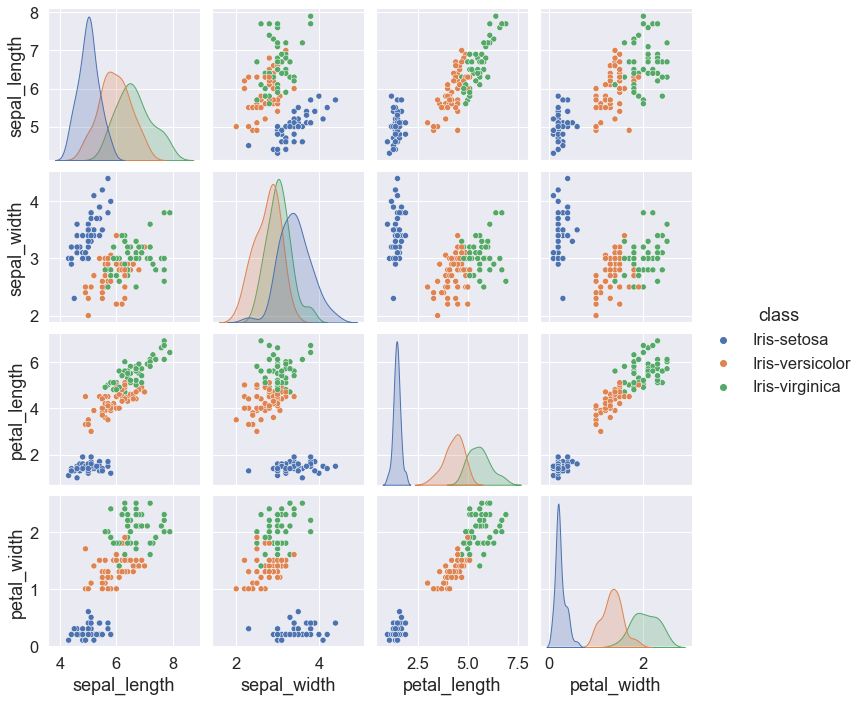

In [48]:
sns.pairplot(df_p, hue='class');